In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np

In [3]:
# Find wavefront coordinates:
def wavefront(ny, nx, wave):
    xmin = max(1, wave - (ny - 1 ))
    xmax = min(wave - 1, nx - 1 - 1)

    return range(xmin, xmax+1), [wave - x for x in range(xmin, xmax+1)]


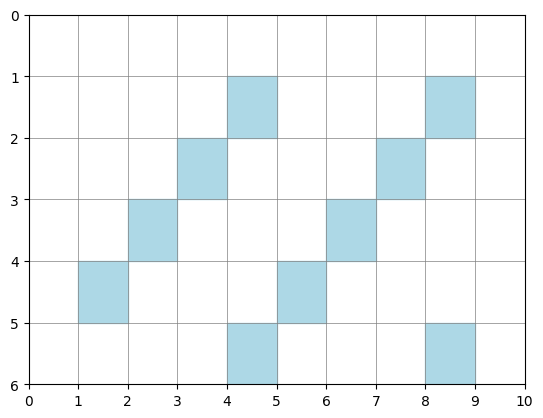

In [117]:
# Set the size of the grid
grid_size_x = 10
grid_size_y = 6

# Create a figure and a grid of subplots
fig, ax = plt.subplots()

# Invert the y-axis to have the origin at the top left corner
ax.invert_yaxis()

# Set the ticks and labels for both axes to represent the grid
ax.set_xticks(range(grid_size_x + 1))
ax.set_yticks(range(grid_size_y + 1))
ax.set_xticklabels(range(grid_size_x + 1))
ax.set_yticklabels(range(grid_size_y + 1))

# Ensure the axis limits are set to show all grid points
ax.set_xlim(0, grid_size_x)
ax.set_ylim(grid_size_y, 0) 

ax.margins(0)

# Draw grid lines
ax.grid(True)


for wave in [0, 1, 5,  9 , 13, 14]:
    a, b = wavefront(grid_size_y, grid_size_x, wave)
    for x, y in zip(a, b):
        rect = Rectangle((x, y), 1, 1, color='lightblue')
        ax.add_patch(rect)

plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)


# Show the plot
plt.show()

In [4]:
# Load the dataframe from data.csv
df = pd.read_csv('data.csv')

# Display the dataframe
print(df)

      algorithm implementation    ny    nx      n  block_y  block_x  \
0        SERIAL           cuda  1024  1024    100        1        1   
1        SERIAL           cuda   256   256    100        1        1   
2        SERIAL            cpp   256   256    100        1        1   
3        SERIAL            cpp  1024  1024    100        1        1   
4          WAVE           cuda  1024  1024   1000       16       16   
5          WAVE           cuda   256   256   1000       16       16   
6          WAVE            cpp  1024  1024   1000        0        0   
7          WAVE            cpp   512   512   1000        0        0   
8          WAVE            cpp   256   256   1000        0        0   
9         WAVE2           cuda    64    64  10000       16       16   
10        WAVE2           cuda  1024  1024  10000       16       16   
11        WAVE2            cpp    64    64  10000        0        0   
12        WAVE2            cpp  1024  1024  10000        0        0   
13    

     algorithm implementation    ny    nx      n  block_y  block_x  \
0       SERIAL           cuda  1024  1024    100        1        1   
1       SERIAL           cuda   256   256    100        1        1   
2       SERIAL            cpp   256   256    100        1        1   
3       SERIAL            cpp  1024  1024    100        1        1   
4         WAVE           cuda  1024  1024   1000       16       16   
5         WAVE           cuda   256   256   1000       16       16   
6         WAVE            cpp  1024  1024   1000        0        0   
7         WAVE            cpp   512   512   1000        0        0   
8         WAVE            cpp   256   256   1000        0        0   
9        WAVE2           cuda    64    64  10000       16       16   
10       WAVE2           cuda  1024  1024  10000       16       16   
11       WAVE2            cpp    64    64  10000        0        0   
12       WAVE2            cpp  1024  1024  10000        0        0   
13       WAVE2      

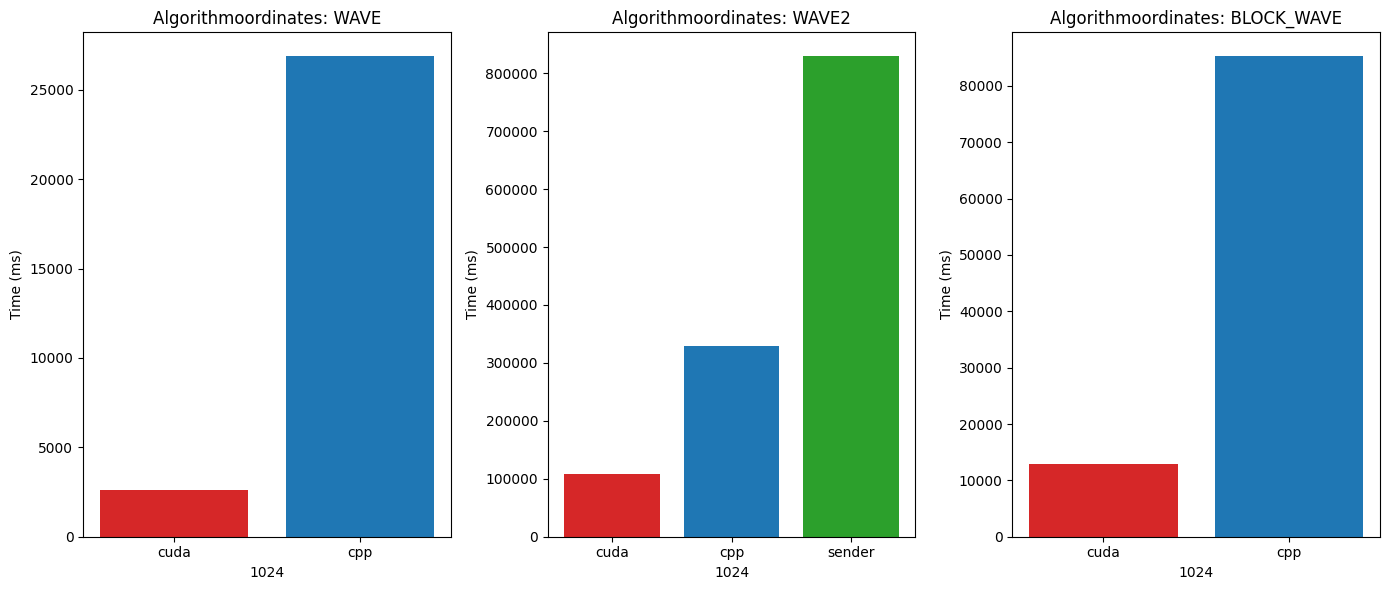

  algorithm implementation    ny    nx     n  block_y  block_x       time  \
4      WAVE           cuda  1024  1024  1000       16       16   2604.692   
6      WAVE            cpp  1024  1024  1000        0        0  26873.000   

   mem_bandwidth  mem_bandwidth_cache    gflops  precision  
4       8.035721             4.821432  1.631711          4  
6       0.778870             0.466100  0.155369          4  
   algorithm implementation    ny    nx      n  block_y  block_x       time  \
10     WAVE2           cuda  1024  1024  10000       16       16  108516.67   
12     WAVE2            cpp  1024  1024  10000        0        0  329043.00   
14     WAVE2         sender  1024  1024  10000        0        0  829138.00   

    mem_bandwidth  mem_bandwidth_cache    gflops  precision  
10       1.928700             1.527000  0.385700          4  
12       0.636104             0.381662  0.127220          4  
14       0.252437             0.151462  0.050487          4  
     algorithm imple

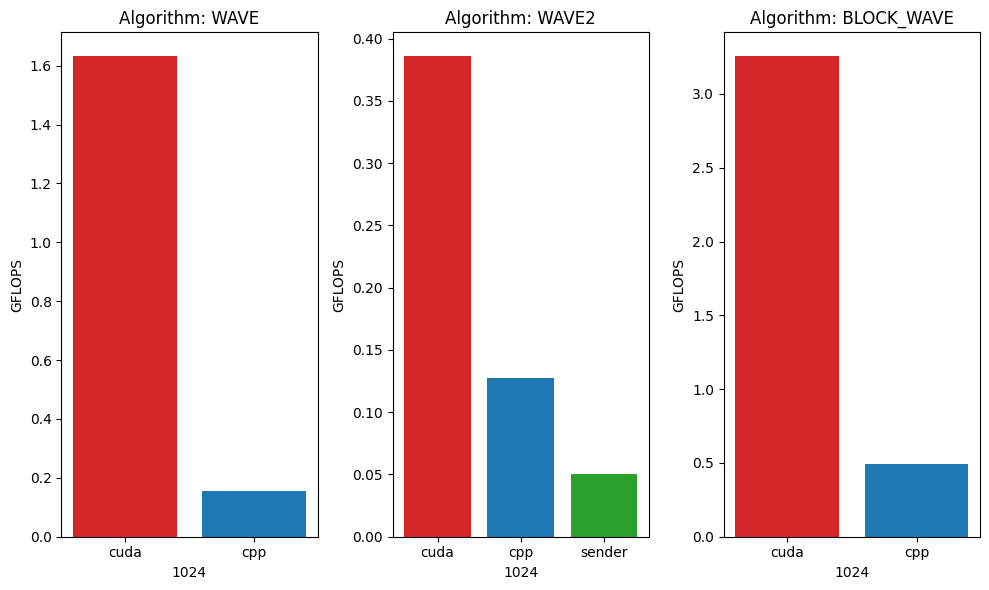

  algorithm implementation    ny    nx     n  block_y  block_x       time  \
4      WAVE           cuda  1024  1024  1000       16       16   2604.692   
6      WAVE            cpp  1024  1024  1000        0        0  26873.000   

   mem_bandwidth  mem_bandwidth_cache    gflops  precision  
4       8.035721             4.821432  1.631711          4  
6       0.778870             0.466100  0.155369          4  
   algorithm implementation    ny    nx      n  block_y  block_x       time  \
10     WAVE2           cuda  1024  1024  10000       16       16  108516.67   
12     WAVE2            cpp  1024  1024  10000        0        0  329043.00   
14     WAVE2         sender  1024  1024  10000        0        0  829138.00   

    mem_bandwidth  mem_bandwidth_cache    gflops  precision  
10       1.928700             1.527000  0.385700          4  
12       0.636104             0.381662  0.127220          4  
14       0.252437             0.151462  0.050487          4  
     algorithm imple

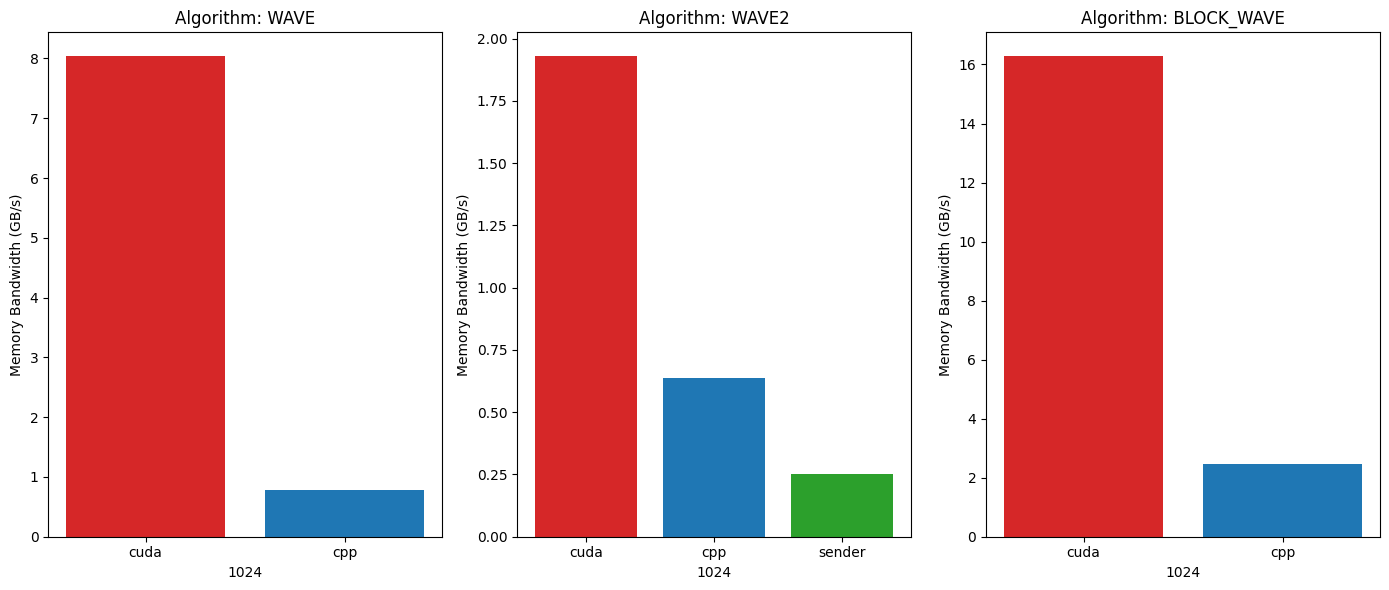

In [7]:
# Exclude 'BLOCK_WAVE2' algorithm
df_filtered = df[df['algorithm'] != 'BLOCK_WAVE2']

# Group the data and compute mean time for each group
grouped_data = df_filtered #.groupby(['algorithm', 'ny', 'nx', 'n', 'block_y', 'block_x', 'implementation', 'time', 'gflops', 'mem_bandwidth'])["gflops"]

print(grouped_data)


problem_sizes = grouped_data['ny'].unique()
algorithms = grouped_data['algorithm'].unique()[1:]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
problem_size = 1024

pdf = grouped_data[grouped_data['ny'] == problem_size]
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(algorithms), figsize=(10, 6))

# Plot each algorithm in a separate subplot with colored implementations
for i, algorithm in enumerate(algorithms):
    algorithm_data = pdf[pdf['algorithm'] == algorithm]
    print(algorithm_data)
    if len(algorithm_data) == 0:
        continue
    axes[i].bar(algorithm_data['implementation'], algorithm_data['time'], color=bar_colors) 
    axes[i].set_xlabel(problem_size)
    axes[i].set_ylabel('Time (ms)')
    axes[i].set_title(f'Algorithmoordinates: {algorithm}')


plt.tight_layout()
plt.savefig('time.svg')
plt.show()


# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(algorithms), figsize=(10, 6))

# Plot each algorithm in a separate subplot with colored implementations
for i, algorithm in enumerate(algorithms):
    algorithm_data = pdf[pdf['algorithm'] == algorithm]
    print(algorithm_data)
    if len(algorithm_data) == 0:
        continue
    axes[i].bar(algorithm_data['implementation'], algorithm_data['gflops'], color=bar_colors) 
    axes[i].set_xlabel(problem_size)
    axes[i].set_ylabel('GFLOPS')
    axes[i].set_title(f'Algorithm: {algorithm}')


plt.tight_layout()
plt.savefig('gflops.svg')
plt.show()

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(algorithms), figsize=(10, 6))

# Plot each algorithm in a separate subplot with colored implementations
for i, algorithm in enumerate(algorithms):
    algorithm_data = pdf[pdf['algorithm'] == algorithm]
    print(algorithm_data)
    if len(algorithm_data) == 0:
        continue
    axes[i].bar(algorithm_data['implementation'], algorithm_data['mem_bandwidth'], color=bar_colors) 
    axes[i].set_xlabel(problem_size)
    axes[i].set_ylabel('Memory Bandwidth (GB/s)')
    axes[i].set_title(f'Algorithm: {algorithm}')


plt.tight_layout()
plt.show()